# Text preparation twitter data with python


#### Importing libraries
For this text preparation process we are going to use the NLTK library 

In [1]:
import pandas as pd
import numpy as np 
import nltk
import plotly
import matplotlib.pyplot as plt 
import re
from nltk.corpus import stopwords
from nltk.corpus import words as voc_en
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer



In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/camilo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/camilo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/camilo/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/camilo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/camilo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Reading Twitter Data

In [3]:
path_in="twitterClimateData.csv"
path_out="out/answer_text_preparation_pyntk"
df = pd.read_csv(path_in,delimiter=";")
df = df[["text","hashtags"]]
df.head()
#filenametxt='pg45438.txt'
#filenamecleantxt='pg45438_clean.txt'
#filenamecsv='pg45438.csv'

,text,hashtags
0,"2020 is the year we #votethemout, the year we ...",#votethemout #climatestrike #rebelforlife
1,Winter has not stopped this group of dedicated...,#climatefriday #climatestrike #ClimateAction
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#ClimateStrike
3,"A year of resistance, as youth protests shaped...",#greta #gretathunberg #climatechange #fridaysf...
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#greta #gretathunberg #climatechange #fridaysf...


#### Text preparation process

 the goal of this process is to reduce the number of tokens in order to create the best bag of words

**1) Standar Tokenization **

In [4]:
stop_words_nltk = set(stopwords.words('english'))

In [5]:
df["hashtags"] = df["hashtags"].astype(str)
df["tokens_text"] = df["text"].apply(nltk.word_tokenize)
df["tokes_hashtags"] = df["hashtags"].apply(nltk.word_tokenize)

In [6]:
df.head()

,text,hashtags,tokens_text,tokes_hashtags
0,"2020 is the year we #votethemout, the year we ...",#votethemout #climatestrike #rebelforlife,"[2020, is, the, year, we, #, votethemout, ,, t...","[#, votethemout, #, climatestrike, #, rebelfor..."
1,Winter has not stopped this group of dedicated...,#climatefriday #climatestrike #ClimateAction,"[Winter, has, not, stopped, this, group, of, d...","[#, climatefriday, #, climatestrike, #, Climat..."
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#ClimateStrike,"[WEEK, 55, of, #, ClimateStrike, at, the, @, U...","[#, ClimateStrike]"
3,"A year of resistance, as youth protests shaped...",#greta #gretathunberg #climatechange #fridaysf...,"[A, year, of, resistance, ,, as, youth, protes...","[#, greta, #, gretathunberg, #, climatechange,..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#greta #gretathunberg #climatechange #fridaysf...,"[HAPPY, HOLIDAYS, #, greta, #, gretathunberg, ...","[#, greta, #, gretathunberg, #, climatechange,..."


In [7]:
# Tokenize todo el contenido de 'text'
all_tokens_text = []
for t in df['tokens_text_text_text_text_text_text_text']:
    all_tokens_text.extend(t)

KeyError: 'tokens_text_text_text_text_text_text_text'

In [ ]:
# Tokenize todo el contenido de 'hashtags'
all_tokens_hashtags = []
for t in df['tokes_hashtags']:
    all_tokens_hashtags.extend(t)

In [ ]:
print("all_tokens_text =",len(all_tokens_text))
print("all_tokens_hashtags =",len(all_tokens_hashtags))

all_tokens_text = 2332507
all_tokens_hashtags = 580281


Creating first BoW

Removing special caracter, stopwords and transformig the text in lowercase

Size of new BoW text = 71977


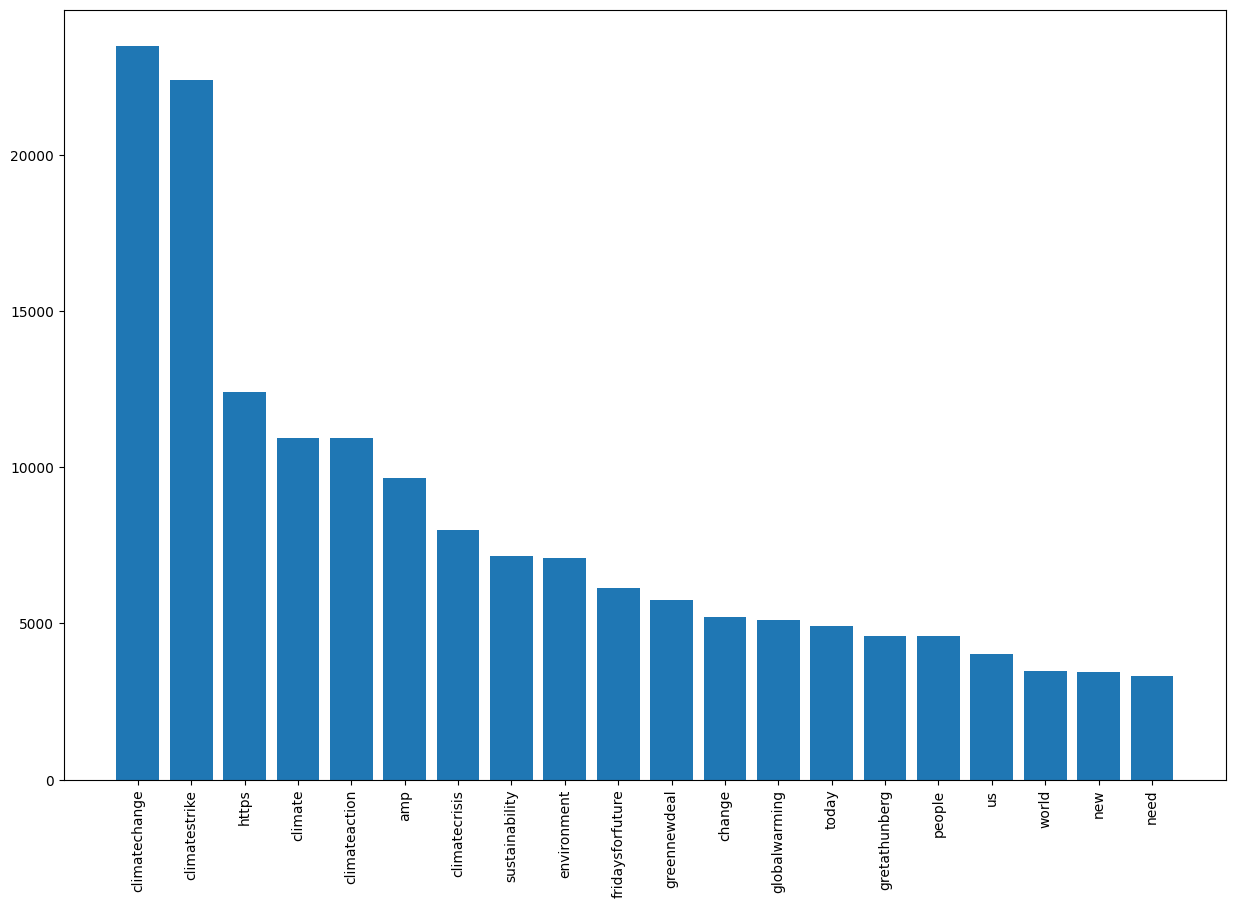

In [ ]:
# process for text
#tokens_text = [re.sub(r'[^A-Za-z0-9]+','',w) for w in all_tokens_text]
tokens_text = [w.lower() for w in all_tokens_text if len(w)>1]
tokens_text = [w for w in tokens_text if w.isalpha()]
tokens_text = [w for w in tokens_text if w not in stop_words_nltk]
fdist = nltk.FreqDist(tokens_text)
topwords = fdist.most_common(20)
print('Size of new BoW text =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Size of new BoW hashtags = 28911


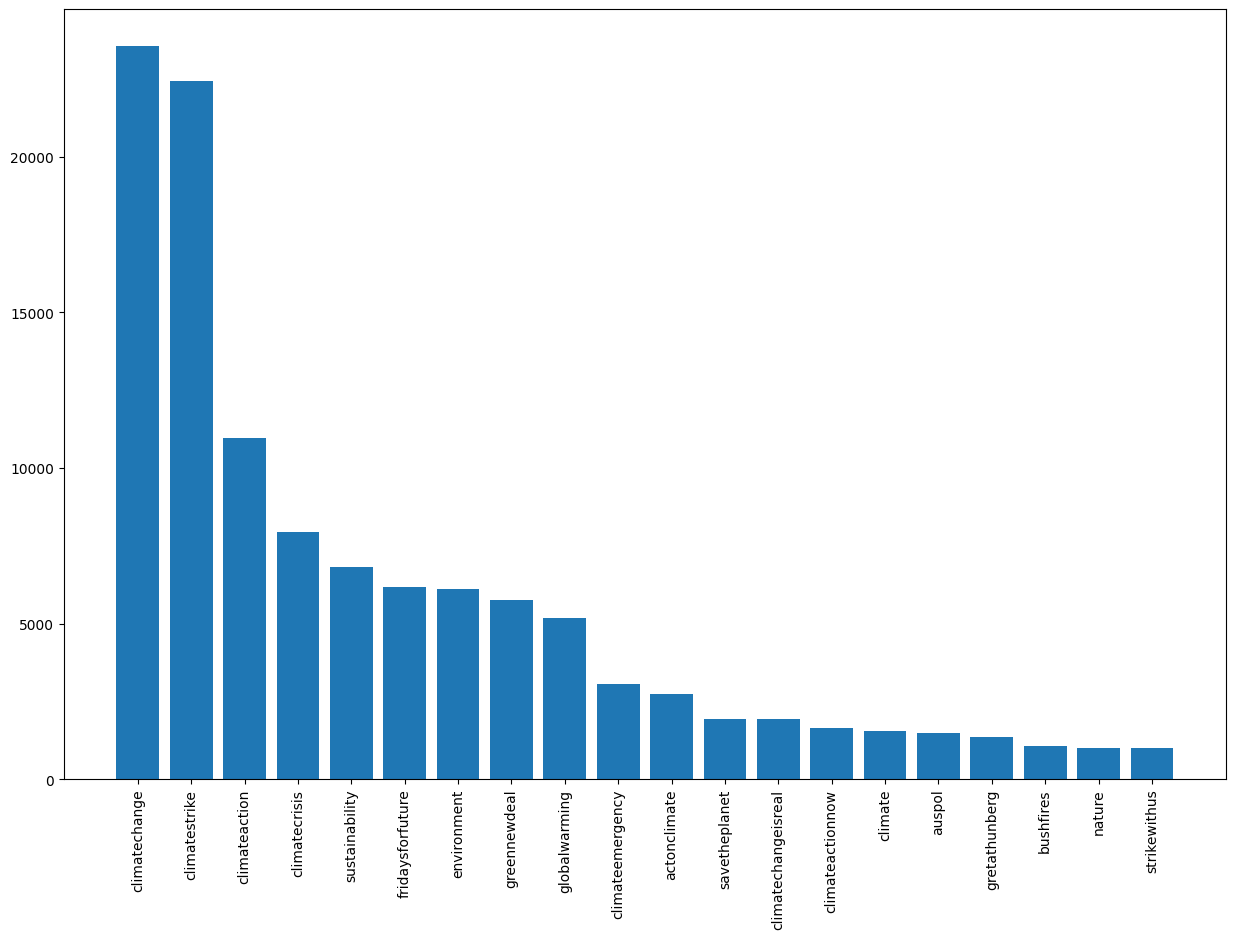

In [ ]:
# process for hashtags
#tokens_hastags = [re.sub(r'[^A-Za-z0-9]+','',w) for w in all_tokens_hashtags]
tokens_hashtags = [w.lower() for w in all_tokens_hashtags if len(w)>1]
tokens_hashtags = [w for w in tokens_hashtags if w.isalpha()]
tokens_hashtags = [w for w in tokens_hashtags if w not in stop_words_nltk]
fdist = nltk.FreqDist(tokens_hashtags)
topwords = fdist.most_common(20)
print('Size of new BoW hashtags =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

**2) Steaming**

Size of new BoW title = 55714


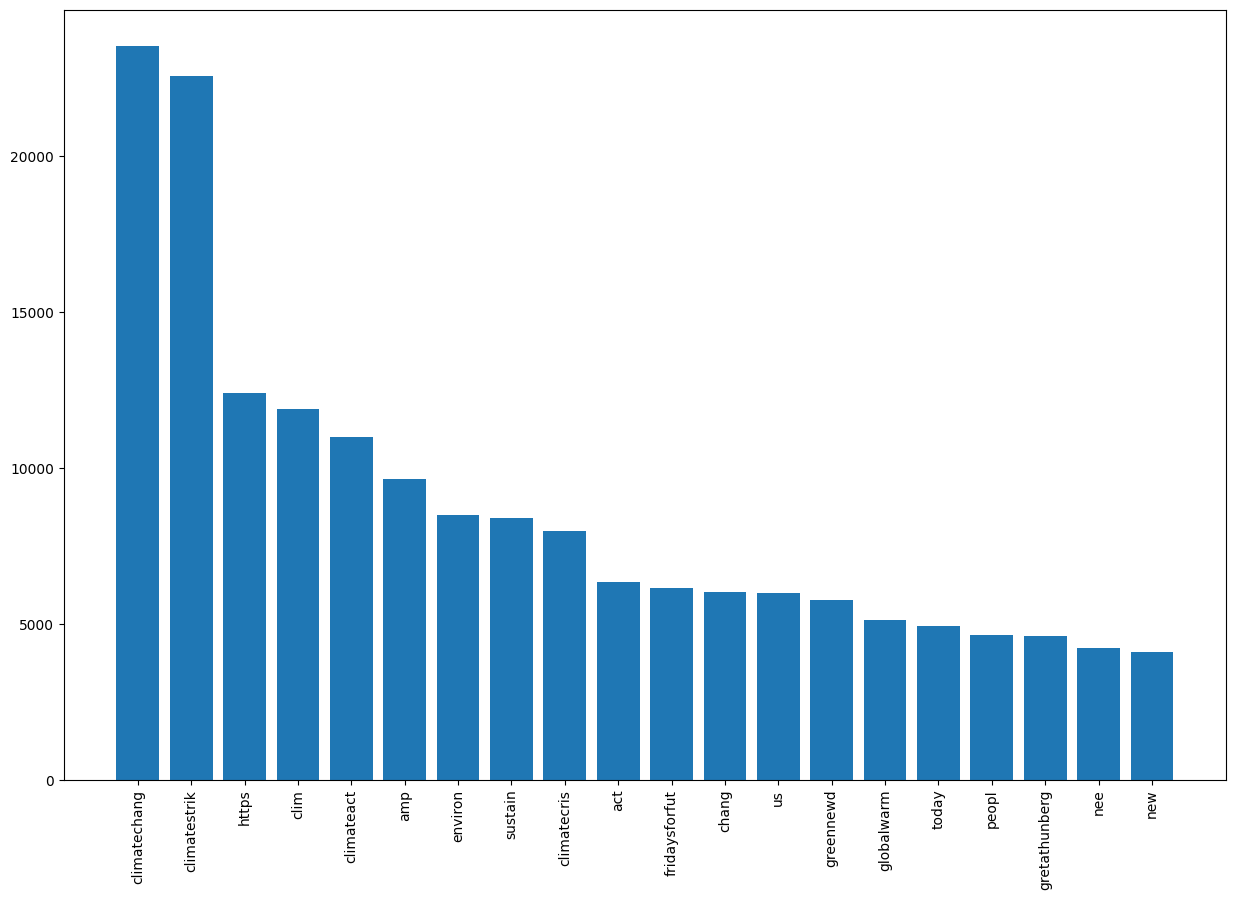

In [ ]:
# Stemming con NLTK

porter = PorterStemmer()
lancaster = LancasterStemmer()

#tokens_text = [porter.stem(w) for w in tokens_text]
tokens_text = [lancaster.stem(w) for w in tokens_text]

fdist = nltk.FreqDist(tokens_text)
topwords = fdist.most_common(20)
print('Size of new BoW text =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Size of new BoW hastags = 26100


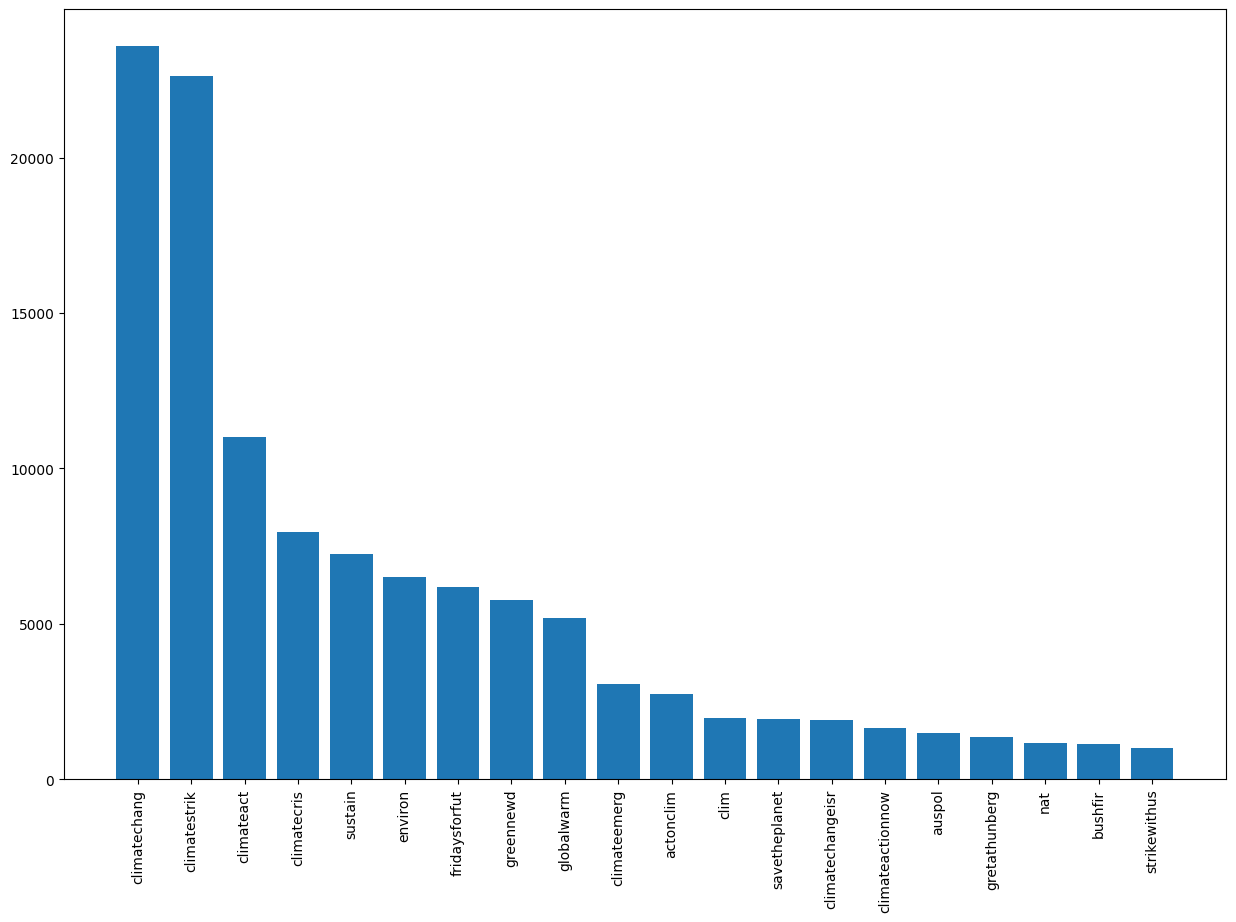

In [ ]:
# Stemming con NLTK

porter = PorterStemmer()
lancaster = LancasterStemmer()

#tokens_hastags = [porter.stem(w) for w in tokens_text]
tokens_hashtags = [lancaster.stem(w) for w in tokens_hashtags]

fdist = nltk.FreqDist(tokens_hashtags)
topwords = fdist.most_common(20)
print('Size of new BoW hashtags =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

**3) Lemmatization**

Size of new BoW text = 55495


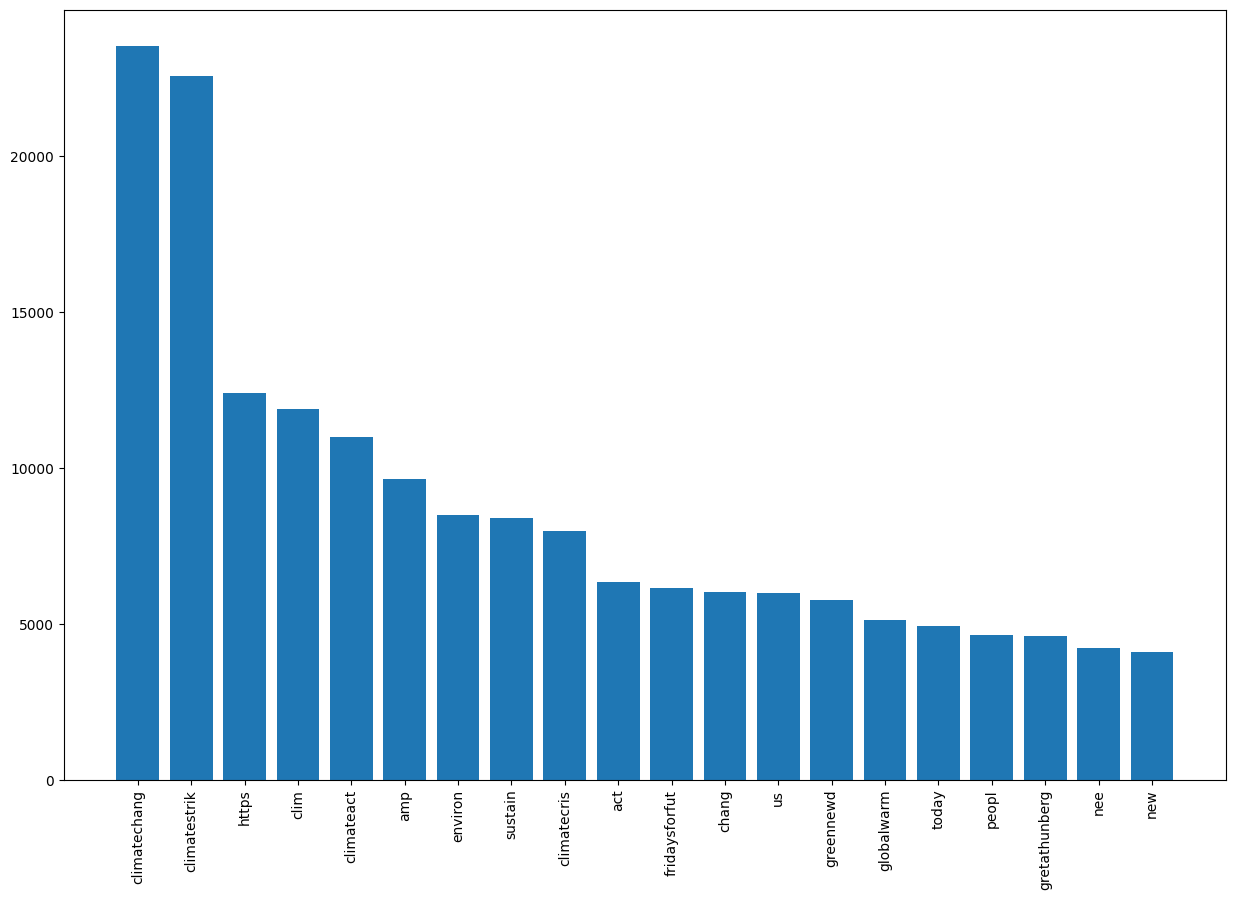

In [ ]:
# Lemmatization con NLTK

wordnet_lemmatizer = WordNetLemmatizer()

#tokens_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens_text ]
tokens_text = [wordnet_lemmatizer.lemmatize(w) for w in tokens_text ]

fdist = nltk.FreqDist(tokens_text)
topwords = fdist.most_common(20)
print('Size of new BoW text =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Size of new BoW hashtags = 26067


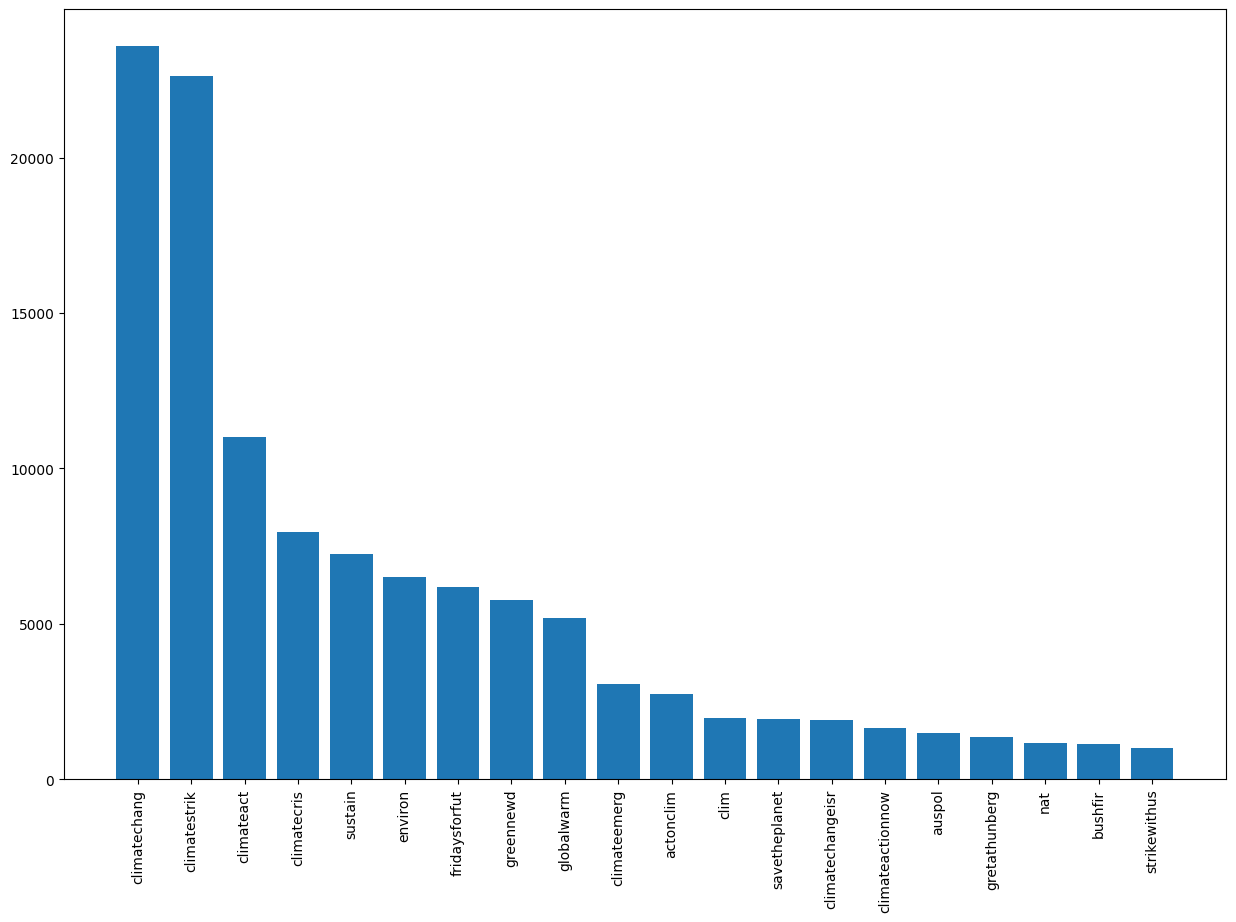

In [ ]:
# Lemmatization con NLTK

wordnet_lemmatizer = WordNetLemmatizer()

#tokens_hastags = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens_hastags ]
tokens_hashtags = [wordnet_lemmatizer.lemmatize(w) for w in tokens_hashtags ]

fdist = nltk.FreqDist(tokens_hashtags)
topwords = fdist.most_common(20)
print('Size of new BoW hashtags =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()